In [84]:
import pandas as pd
import matplotlib.pyplot as mp

In [85]:
path_root = "./statistics/"

versions = ["cpu-dummy","redux","struct","coalesced"]
_INDEX_     = "NUM OF CORES"
_EXEC_TIME_ = "EXECUTION TIME"

In [86]:
%ls ./statistics

coalesced-aws.csv   local/         struct-aws.csv      struct3-aws.csv
coalesced2-aws.csv  normal/        struct-opt-aws.csv  struct4-aws.csv
cpu-dummy-aws.csv   redux-aws.csv  struct2-aws.csv


In [101]:
#Load csv data into a panda array
def load_statistic(path):
    path = path_root + path + "-aws.csv"
    print("Loading: " + path)
    x = pd.read_csv(path)
    #x = x.set_index(_INDEX_)
    return x

In [102]:
#Load all files with name contained in versions eg: ["redux","struct"]
def load_all_statistics(versions):
    res = {}
    for v in versions:
        res[v] = load_statistic(v)
    return res

In [103]:
#Merge all statistics in a single dataframe (mantain only execution times)
def merge_statistics(statistics):
    merged = load_statistic("redux")
    for s in statistics:
        merged[s] = statistics[s][_EXEC_TIME_]
    merged = merged[["NUM OF CORES"] + versions]
    return merged

In [104]:
#Can plot versions comparisons by passing an array of versions names eg ["redux","struct"]
def plot_versions(data,versions_to_plot):
    data.plot(x=_INDEX_, y=versions_to_plot,kind="line", figsize=(10, 10))
    # display plot
    mp.show()

In [105]:
def calculate_speedup(data,versions,reference_version="cpu-dummy"):
    df = pd.DataFrame(data)
    for v in versions:
        df["Speedup-"+v] = df[reference_version] / df[v]
        
    df = df.drop(["Speedup-"+reference_version],axis=1)
    return df

In [106]:
statistics = load_all_statistics(versions)
merged = merge_statistics(statistics)
speedups = calculate_speedup(merged,versions,"cpu-dummy")

Loading: ./statistics/cpu-dummy-aws.csv
Loading: ./statistics/redux-aws.csv
Loading: ./statistics/struct-aws.csv
Loading: ./statistics/coalesced-aws.csv
Loading: ./statistics/redux-aws.csv


In [107]:
merged

,NUM OF CORES,cpu-dummy,redux,struct,coalesced,Speedup-cpu-dummy,Speedup-redux,Speedup-struct,Speedup-coalesced
0,16,1.607047,0.425617,0.466114,0.319937,1.0,3.775805,3.447755,5.023010
1,25,3.889239,0.463464,0.524589,0.335340,1.0,8.391674,7.413878,11.597897
2,36,7.573095,0.667788,0.665717,0.386682,1.0,11.340567,11.375849,19.584824
3,49,14.063768,1.018746,0.976122,0.474588,1.0,13.804978,14.407799,29.633641
4,64,23.487239,1.670904,1.446056,0.598059,1.0,14.056604,16.242276,39.272433
5,81,37.771901,2.595702,2.136893,0.788512,1.0,14.551710,17.676084,47.902761
6,100,56.842011,3.870425,3.029770,1.052209,1.0,14.686245,18.761164,54.021603
7,121,83.592402,5.647244,4.295276,1.421808,1.0,14.802336,19.461474,58.793041
8,144,117.360463,7.838579,5.923920,1.899554,1.0,14.972161,19.811285,61.783167
9,169,162.270304,10.899327,8.053699,2.483355,1.0,14.888103,20.148543,65.343175


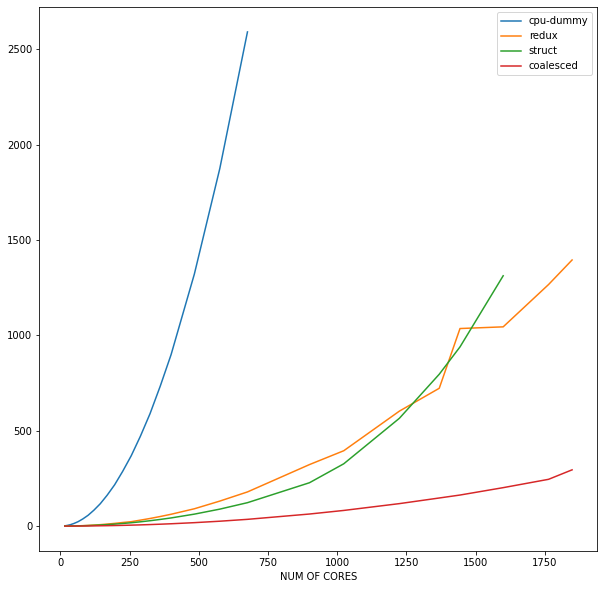

In [108]:
plot_versions(merged,versions) #Can plot versions comparisons by passing an array of versions names eg ["redux","struct"]

In [109]:
speedups

,NUM OF CORES,cpu-dummy,redux,struct,coalesced,Speedup-redux,Speedup-struct,Speedup-coalesced
0,16,1.607047,0.425617,0.466114,0.319937,3.775805,3.447755,5.023010
1,25,3.889239,0.463464,0.524589,0.335340,8.391674,7.413878,11.597897
2,36,7.573095,0.667788,0.665717,0.386682,11.340567,11.375849,19.584824
3,49,14.063768,1.018746,0.976122,0.474588,13.804978,14.407799,29.633641
4,64,23.487239,1.670904,1.446056,0.598059,14.056604,16.242276,39.272433
5,81,37.771901,2.595702,2.136893,0.788512,14.551710,17.676084,47.902761
6,100,56.842011,3.870425,3.029770,1.052209,14.686245,18.761164,54.021603
7,121,83.592402,5.647244,4.295276,1.421808,14.802336,19.461474,58.793041
8,144,117.360463,7.838579,5.923920,1.899554,14.972161,19.811285,61.783167
9,169,162.270304,10.899327,8.053699,2.483355,14.888103,20.148543,65.343175
